In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
import pandas as pd
import optuna


Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../../train_belgrade.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [3]:
le = LabelEncoder()
df['WeatherMain'] = le.fit_transform(df['WeatherMain'])

In [4]:
df['ds'] = df['Timestamp']
df['y'] = df['Detections']

In [5]:
X = df.drop(['Detections', 'y'], axis=1)
y = df['y']

In [6]:
train_size = int(len(df) * 0.95)
train, test = df[0:train_size], df[train_size:]

In [7]:
def objective(trial):
    """
        - changepoint_prior_scale: Adjusts the flexibility of the trend component.
        - seasonality_prior_scale: Controls the strength of the seasonality model.
        - seasonality_mode: Whether seasonality effects should be added to or multiplied by the trend component.
    """
    param = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 0.5),
        'seasonality_prior_scale': trial.suggest_float('seasonality_prior_scale', 0.01, 10),
        'seasonality_mode': trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative']),
        'daily_seasonality': True
    }

    m = Prophet(
        **param
    )
    m.fit(train)
    from prophet.diagnostics import cross_validation, performance_metrics
    df_cv = cross_validation(m, initial='10080 minutes', period='1440 minutes', horizon='1440 minutes')
    df_p = performance_metrics(df_cv)
    # Optimize for minimum MAE
    mse = df_p['mse'].mean()
    return mse

In [8]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-03-10 12:02:49,265] A new study created in memory with name: no-name-f21fd054-0fef-4511-8df1-09ea9d4d6dca
12:02:49 - cmdstanpy - INFO - Chain [1] start processing
12:02:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/34 [00:00<?, ?it/s]

12:02:57 - cmdstanpy - INFO - Chain [1] start processing
12:02:57 - cmdstanpy - INFO - Chain [1] done processing
12:02:57 - cmdstanpy - INFO - Chain [1] start processing
12:02:57 - cmdstanpy - INFO - Chain [1] done processing
12:02:57 - cmdstanpy - INFO - Chain [1] start processing
12:02:58 - cmdstanpy - INFO - Chain [1] done processing
12:02:58 - cmdstanpy - INFO - Chain [1] start processing
12:02:59 - cmdstanpy - INFO - Chain [1] done processing
12:02:59 - cmdstanpy - INFO - Chain [1] start processing
12:03:00 - cmdstanpy - INFO - Chain [1] done processing
12:03:00 - cmdstanpy - INFO - Chain [1] start processing
12:03:00 - cmdstanpy - INFO - Chain [1] done processing
12:03:00 - cmdstanpy - INFO - Chain [1] start processing
12:03:01 - cmdstanpy - INFO - Chain [1] done processing
12:03:01 - cmdstanpy - INFO - Chain [1] start processing
12:03:02 - cmdstanpy - INFO - Chain [1] done processing
12:03:02 - cmdstanpy - INFO - Chain [1] start processing
12:03:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

12:04:15 - cmdstanpy - INFO - Chain [1] start processing
12:04:15 - cmdstanpy - INFO - Chain [1] done processing
12:04:15 - cmdstanpy - INFO - Chain [1] start processing
12:04:16 - cmdstanpy - INFO - Chain [1] done processing
12:04:16 - cmdstanpy - INFO - Chain [1] start processing
12:04:16 - cmdstanpy - INFO - Chain [1] done processing
12:04:16 - cmdstanpy - INFO - Chain [1] start processing
12:04:16 - cmdstanpy - INFO - Chain [1] done processing
12:04:17 - cmdstanpy - INFO - Chain [1] start processing
12:04:17 - cmdstanpy - INFO - Chain [1] done processing
12:04:17 - cmdstanpy - INFO - Chain [1] start processing
12:04:17 - cmdstanpy - INFO - Chain [1] done processing
12:04:17 - cmdstanpy - INFO - Chain [1] start processing
12:04:18 - cmdstanpy - INFO - Chain [1] done processing
12:04:18 - cmdstanpy - INFO - Chain [1] start processing
12:04:18 - cmdstanpy - INFO - Chain [1] done processing
12:04:18 - cmdstanpy - INFO - Chain [1] start processing
12:04:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

12:05:20 - cmdstanpy - INFO - Chain [1] start processing
12:05:20 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:22 - cmdstanpy - INFO - Chain [1] done processing
12:05:22 - cmdstanpy - INFO - Chain [1] start processing
12:05:23 - cmdstanpy - INFO - Chain [1] done processing
12:05:23 - cmdstanpy - INFO - Chain [1] start processing
12:05:23 - cmdstanpy - INFO - Chain [1] done processing
12:05:23 - cmdstanpy - INFO - Chain [1] start processing
12:05:24 - cmdstanpy - INFO - Chain [1] done processing
12:05:24 - cmdstanpy - INFO - Chain [1] start processing
12:05:25 - cmdstanpy - INFO - Chain [1] done processing
12:05:25 - cmdstanpy - INFO - Chain [1] start processing
12:05:25 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

12:06:35 - cmdstanpy - INFO - Chain [1] start processing
12:06:35 - cmdstanpy - INFO - Chain [1] done processing
12:06:36 - cmdstanpy - INFO - Chain [1] start processing
12:06:36 - cmdstanpy - INFO - Chain [1] done processing
12:06:36 - cmdstanpy - INFO - Chain [1] start processing
12:06:36 - cmdstanpy - INFO - Chain [1] done processing
12:06:37 - cmdstanpy - INFO - Chain [1] start processing
12:06:37 - cmdstanpy - INFO - Chain [1] done processing
12:06:37 - cmdstanpy - INFO - Chain [1] start processing
12:06:38 - cmdstanpy - INFO - Chain [1] done processing
12:06:38 - cmdstanpy - INFO - Chain [1] start processing
12:06:38 - cmdstanpy - INFO - Chain [1] done processing
12:06:38 - cmdstanpy - INFO - Chain [1] start processing
12:06:39 - cmdstanpy - INFO - Chain [1] done processing
12:06:39 - cmdstanpy - INFO - Chain [1] start processing
12:06:39 - cmdstanpy - INFO - Chain [1] done processing
12:06:40 - cmdstanpy - INFO - Chain [1] start processing
12:06:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

12:07:55 - cmdstanpy - INFO - Chain [1] start processing
12:07:55 - cmdstanpy - INFO - Chain [1] done processing
12:07:55 - cmdstanpy - INFO - Chain [1] start processing
12:07:56 - cmdstanpy - INFO - Chain [1] done processing
12:07:56 - cmdstanpy - INFO - Chain [1] start processing
12:07:57 - cmdstanpy - INFO - Chain [1] done processing
12:07:57 - cmdstanpy - INFO - Chain [1] start processing
12:07:58 - cmdstanpy - INFO - Chain [1] done processing
12:07:58 - cmdstanpy - INFO - Chain [1] start processing
12:07:59 - cmdstanpy - INFO - Chain [1] done processing
12:07:59 - cmdstanpy - INFO - Chain [1] start processing
12:08:00 - cmdstanpy - INFO - Chain [1] done processing
12:08:00 - cmdstanpy - INFO - Chain [1] start processing
12:08:01 - cmdstanpy - INFO - Chain [1] done processing
12:08:01 - cmdstanpy - INFO - Chain [1] start processing
12:08:02 - cmdstanpy - INFO - Chain [1] done processing
12:08:02 - cmdstanpy - INFO - Chain [1] start processing
12:08:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

12:09:18 - cmdstanpy - INFO - Chain [1] start processing
12:09:18 - cmdstanpy - INFO - Chain [1] done processing
12:09:18 - cmdstanpy - INFO - Chain [1] start processing
12:09:18 - cmdstanpy - INFO - Chain [1] done processing
12:09:19 - cmdstanpy - INFO - Chain [1] start processing
12:09:19 - cmdstanpy - INFO - Chain [1] done processing
12:09:19 - cmdstanpy - INFO - Chain [1] start processing
12:09:19 - cmdstanpy - INFO - Chain [1] done processing
12:09:20 - cmdstanpy - INFO - Chain [1] start processing
12:09:20 - cmdstanpy - INFO - Chain [1] done processing
12:09:20 - cmdstanpy - INFO - Chain [1] start processing
12:09:21 - cmdstanpy - INFO - Chain [1] done processing
12:09:21 - cmdstanpy - INFO - Chain [1] start processing
12:09:21 - cmdstanpy - INFO - Chain [1] done processing
12:09:21 - cmdstanpy - INFO - Chain [1] start processing
12:09:22 - cmdstanpy - INFO - Chain [1] done processing
12:09:22 - cmdstanpy - INFO - Chain [1] start processing
12:09:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:07 - cmdstanpy - INFO - Chain [1] done processing
16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:07 - cmdstanpy - INFO - Chain [1] done processing
16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:07 - cmdstanpy - INFO - Chain [1] done processing
16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:08 - cmdstanpy - INFO - Chain [1] done processing
16:11:08 - cmdstanpy - INFO - Chain [1] start processing
16:11:08 - cmdstanpy - INFO - Chain [1] done processing
16:11:08 - cmdstanpy - INFO - Chain [1] start processing
16:11:08 - cmdstanpy - INFO - Chain [1] done processing
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
16:11:10 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

17:12:14 - cmdstanpy - INFO - Chain [1] start processing
17:12:14 - cmdstanpy - INFO - Chain [1] done processing
17:12:14 - cmdstanpy - INFO - Chain [1] start processing
17:12:15 - cmdstanpy - INFO - Chain [1] done processing
17:12:15 - cmdstanpy - INFO - Chain [1] start processing
17:12:15 - cmdstanpy - INFO - Chain [1] done processing
17:12:15 - cmdstanpy - INFO - Chain [1] start processing
17:12:16 - cmdstanpy - INFO - Chain [1] done processing
17:12:16 - cmdstanpy - INFO - Chain [1] start processing
17:12:16 - cmdstanpy - INFO - Chain [1] done processing
17:12:17 - cmdstanpy - INFO - Chain [1] start processing
17:12:17 - cmdstanpy - INFO - Chain [1] done processing
17:12:17 - cmdstanpy - INFO - Chain [1] start processing
17:12:18 - cmdstanpy - INFO - Chain [1] done processing
17:12:18 - cmdstanpy - INFO - Chain [1] start processing
17:12:19 - cmdstanpy - INFO - Chain [1] done processing
17:12:19 - cmdstanpy - INFO - Chain [1] start processing
17:12:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

18:30:08 - cmdstanpy - INFO - Chain [1] start processing
18:30:08 - cmdstanpy - INFO - Chain [1] done processing
18:30:08 - cmdstanpy - INFO - Chain [1] start processing
18:30:09 - cmdstanpy - INFO - Chain [1] done processing
18:30:09 - cmdstanpy - INFO - Chain [1] start processing
18:30:10 - cmdstanpy - INFO - Chain [1] done processing
18:30:10 - cmdstanpy - INFO - Chain [1] start processing
18:30:10 - cmdstanpy - INFO - Chain [1] done processing
18:30:11 - cmdstanpy - INFO - Chain [1] start processing
18:30:11 - cmdstanpy - INFO - Chain [1] done processing
18:30:12 - cmdstanpy - INFO - Chain [1] start processing
18:30:12 - cmdstanpy - INFO - Chain [1] done processing
18:30:12 - cmdstanpy - INFO - Chain [1] start processing
18:30:13 - cmdstanpy - INFO - Chain [1] done processing
18:30:14 - cmdstanpy - INFO - Chain [1] start processing
18:30:14 - cmdstanpy - INFO - Chain [1] done processing
18:30:15 - cmdstanpy - INFO - Chain [1] start processing
18:30:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

20:05:33 - cmdstanpy - INFO - Chain [1] start processing
20:05:33 - cmdstanpy - INFO - Chain [1] done processing
20:05:33 - cmdstanpy - INFO - Chain [1] start processing
20:05:34 - cmdstanpy - INFO - Chain [1] done processing
20:05:34 - cmdstanpy - INFO - Chain [1] start processing
20:05:34 - cmdstanpy - INFO - Chain [1] done processing
20:05:34 - cmdstanpy - INFO - Chain [1] start processing
20:05:34 - cmdstanpy - INFO - Chain [1] done processing
20:05:35 - cmdstanpy - INFO - Chain [1] start processing
20:05:35 - cmdstanpy - INFO - Chain [1] done processing
20:05:35 - cmdstanpy - INFO - Chain [1] start processing
20:05:35 - cmdstanpy - INFO - Chain [1] done processing
20:05:35 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1] done processing
20:05:36 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1] done processing
20:05:36 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1]

In [9]:
print(study.best_params)

{'changepoint_prior_scale': 0.04047262835666663, 'seasonality_prior_scale': 3.0546551281039633, 'seasonality_mode': 'additive'}


In [21]:
best_params = {'changepoint_prior_scale': 0.04047262835666663, 'seasonality_prior_scale': 3.0546551281039633, 'seasonality_mode': 'additive'}
# best_params = {'changepoint_prior_scale': 0.1627609418930574, 'seasonality_prior_scale': 2.8007468848907893, 'seasonality_mode': 'additive'}

In [22]:
# best_params = study.best_params
m_optimized = Prophet(
    **best_params
)
m_optimized.fit(train)

21:32:39 - cmdstanpy - INFO - Chain [1] start processing
21:32:40 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast = m_optimized.predict(test)


In [24]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-13 05:00:00.260439,9.920122,0.689161,11.899509,9.920122,9.920122,-3.787474,-3.787474,-3.787474,-4.424759,-4.424759,-4.424759,0.637285,0.637285,0.637285,0.0,0.0,0.0,6.132648
1,2024-01-13 05:05:00.330773,9.919765,0.705696,12.742365,9.919765,9.919765,-3.462729,-3.462729,-3.462729,-4.092557,-4.092557,-4.092557,0.629827,0.629827,0.629827,0.0,0.0,0.0,6.457035
2,2024-01-13 05:10:00.455337,9.919407,0.722512,12.586054,9.919407,9.919407,-3.134222,-3.134222,-3.134222,-3.756583,-3.756583,-3.756583,0.622361,0.622361,0.622361,0.0,0.0,0.0,6.785186
3,2024-01-13 05:15:00.386167,9.919050,1.542795,12.815583,9.919050,9.919050,-2.802871,-2.802871,-2.802871,-3.417757,-3.417757,-3.417757,0.614886,0.614886,0.614886,0.0,0.0,0.0,7.116179
4,2024-01-13 05:20:00.288023,9.918693,1.199735,13.359957,9.918693,9.918693,-2.469605,-2.469605,-2.469605,-3.077007,-3.077007,-3.077007,0.607402,0.607402,0.607402,0.0,0.0,0.0,7.449088


In [25]:

predictions = forecast['yhat'][-len(test):]

from sklearn.metrics import mean_squared_error, mean_absolute_error

actual = test['y']

mse_test = mean_squared_error(actual, predictions)
mae_test = mean_absolute_error(actual, predictions)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")

Test MSE: 28.86532869049519
Test MAE: 4.332346225048891


In [26]:
import matplotlib.pyplot as plt

In [30]:
test.head()

,Unnamed: 0,Timestamp,Detections,index,WeatherMain,Temperature,WeatherDescription,ds,y
13905,13905,2024-01-13 05:00:00.260439,7,5129,0,-2.61,clear sky,2024-01-13 05:00:00.260439,7
13906,13906,2024-01-13 05:05:00.330773,2,12860,0,-2.61,clear sky,2024-01-13 05:05:00.330773,2
13907,13907,2024-01-13 05:10:00.455337,7,7651,0,-2.61,clear sky,2024-01-13 05:10:00.455337,7
13908,13908,2024-01-13 05:15:00.386167,8,4777,0,-2.61,clear sky,2024-01-13 05:15:00.386167,8
13909,13909,2024-01-13 05:20:00.288023,6,7309,0,-2.61,clear sky,2024-01-13 05:20:00.288023,6


In [32]:
actual.head()

13905    7
13906    2
13907    7
13908    8
13909    6
Name: y, dtype: int64

In [ ]:
pred

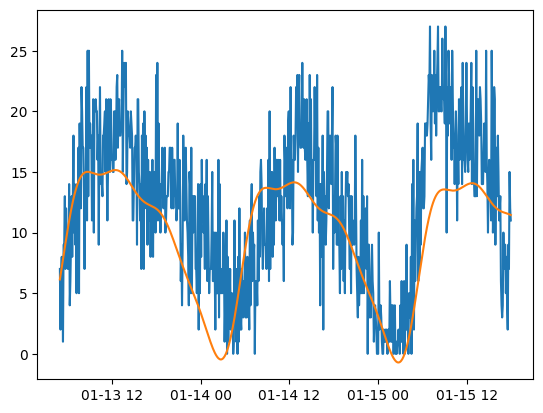

In [33]:
plt.plot(test['Timestamp'], actual)
plt.plot(test['Timestamp'], predictions)
plt.show()

In [37]:
print(len(actual))

732


In [13]:
print(actual.iloc[0])

7


In [14]:
print(predictions.iloc[0])

4.119556476206736


In [15]:
suma = 0
for i in range(20):
    suma += (actual.iloc[i] - predictions.iloc[i]) ** 2
    print(actual.iloc[i], predictions.iloc[i])
suma /= len(predictions)

7 4.119556476206736
2 3.9153187001113707
7 4.5310465466034735
8 5.167985087369467
6 4.262183400671794
1 5.687361931179728
9 4.962127639261485
9 3.31716099392243
13 3.112923217824968
7 3.728651064314933
12 4.365589605083469
9 3.45978791833657
10 4.884966448842016
7 4.15973215675155
7 2.5147655116412384
14 2.310527735538569
4 2.9262555820315477
6 3.5631941227980306
9 2.6573924360512367
13 4.08257096655861


In [16]:
suma

0.8400792421872185

In [17]:
print(len(test))

732


In [18]:
actual

13905     7
13906     2
13907     7
13908     8
13909     6
         ..
14632     9
14633     7
14634    15
14635    12
14636    11
Name: y, Length: 732, dtype: int64

In [19]:
predictions.head()

12028    4.119556
12029    3.915319
12030    4.531047
12031    5.167985
12032    4.262183
Name: yhat, dtype: float64

In [20]:
max(actual)

27

In [21]:
max(predictions)

5.687361931179728